# T1-Map Creation 

This notebook shows the procedure for creating a more realistic T1-map to be used in the concentration-estimates. These maps are based on literature values for T1-relaxation times of various types of tissue. While these values are probably not very precise measures, they are a huge step forward compared to the previously used synthetic maps.

The values are taken from the first chapter of the book "The Physics and Mathematics of MRI" by Ansorge and Graves. An alternative source would be the supplementary material of Vegards sleep-paper: This both contains estimates for the subject group of that paper, in addition to a description on how these values could be estimated from the T1-weighted images.

In the future, these values will rather be taken directly from LookLocker-sequences of the data. This, however, requires some work to be able to estimate them, and is therefore postponed for later. 

In [115]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
from typing import Optional

import pint
import nibabel
import numpy as np
import matplotlib.pyplot as plt

from parkrec.mriprocessing import t1maps
from parkrec.settings import patient_data_settings
from parkrec.analysis import seg_groups

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The following dictionary contains the literature values for the T1 relaxation times in the corresponding pieces of tissue. To create the corresponding T1-times, we need to,

1. Map a brain segmentation to a coarse segmentations with labels for

    a. White matter
    b. Gray matter
    c. Spinal cord.

   the CSF-segments should be removed.
2. From the rough segments, create a corresponding T1-map where we insert literature values for the relaxation times in all the pixels corresponding to a specific region.

### T1 Relaxation Times 

Current approach has a few issues: For one, I am not checking whether different segments are overlapping. It currently writes segments in order of the dictionary (assuming python version later that 3.7 or something around that). 

In [116]:
times = t1maps.ANSORGE_T1_TIMES
for key, val in times.items():
    print(f"{key:<20}: {val}")
times = {key: val.to("ms").magnitude for key, val in times.items()}

csf                 : 3700.0 millisecond
white-matter        : 1084.0 millisecond
gray-matter         : 1274.0 millisecond
brainstem           : 993.0 millisecond


In [117]:
subject = "PAT_002"
paths = patient_data_settings("PAT_002")

slice_idx = np.s_[:, :, 115]
aseg = nibabel.load(paths.patient_root / "mri/aseg.mgz").get_fdata()
aseg[aseg == 0] = np.nan

In [132]:
paths = patient_data_settings(subject)
aseg_file = paths.patient_root / "mri/aseg.mgz"
# t1map_image(aseg_file=aseg, output=paths.patient_root / "t1map.mgz")
# mask_image(aseg_file=aseg, output=paths.patient_root / "brainmask.mgz")

In [144]:
times = {key: val.to("ms").magnitude for key, val in ANSORGE_T1_TIMES.items()}
aseg = nibabel.load(aseg_file).get_fdata()
data = create_t1_map(aseg, times, times["white-matter"], dropcsf=True)

In [145]:
aseg_file = paths.patient_root / "mri/aseg.mgz"

In [167]:
data = aseg[~np.logical_or(np.isnan(aseg), aseg != 0)]

In [178]:
all_labels = np.unique(aseg[np.logical_and(~np.isnan(aseg), aseg != 0)])

In [180]:
data = np.logical_and(~np.isnan(aseg), aseg != 0)

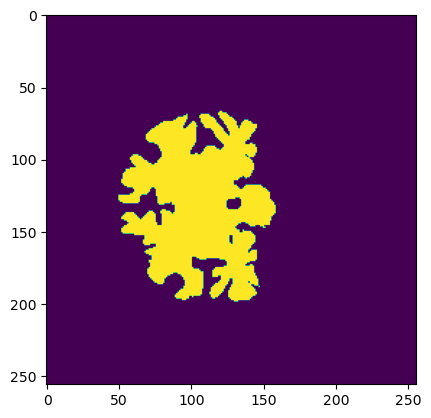

In [181]:
plt.imshow(data[slice_idx])

In [ ]:
plt.

In [179]:
all_labels

array([  2.,   3.,   4.,   5.,   7.,   8.,  10.,  11.,  12.,  13.,  14.,
        15.,  16.,  17.,  18.,  24.,  26.,  28.,  30.,  31.,  41.,  42.,
        43.,  44.,  46.,  47.,  49.,  50.,  51.,  52.,  53.,  54.,  58.,
        60.,  62.,  63.,  77.,  85., 251., 252., 253., 254., 255.])

In [151]:
?np.logical_and

In [152]:
aseg[~np.logical_and(np.isnan(aseg), aseg != 0)]

array([0., 0., 0., ..., 0., 0., 0.])

In [153]:
np.logical_and(np.isnan(aseg), aseg != 0)

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

In [147]:
all_labels

array([  0.,   2.,   3.,   4.,   5.,   7.,   8.,  10.,  11.,  12.,  13.,
        14.,  15.,  16.,  17.,  18.,  24.,  26.,  28.,  30.,  31.,  41.,
        42.,  43.,  44.,  46.,  47.,  49.,  50.,  51.,  52.,  53.,  54.,
        58.,  60.,  62.,  63.,  77.,  85., 251., 252., 253., 254., 255.])

In [ ]:
all_labels.p

In [ ]:
np.

In [ ]:
np.ra


In [148]:
np.setxor1d([0], all_labels)

array([  2.,   3.,   4.,   5.,   7.,   8.,  10.,  11.,  12.,  13.,  14.,
        15.,  16.,  17.,  18.,  24.,  26.,  28.,  30.,  31.,  41.,  42.,
        43.,  44.,  46.,  47.,  49.,  50.,  51.,  52.,  53.,  54.,  58.,
        60.,  62.,  63.,  77.,  85., 251., 252., 253., 254., 255.])

In [141]:
base_mask(aseg.get_fdata())

array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  Tr

#### Remove Fake Choroid Plexus Values from within Ventricles

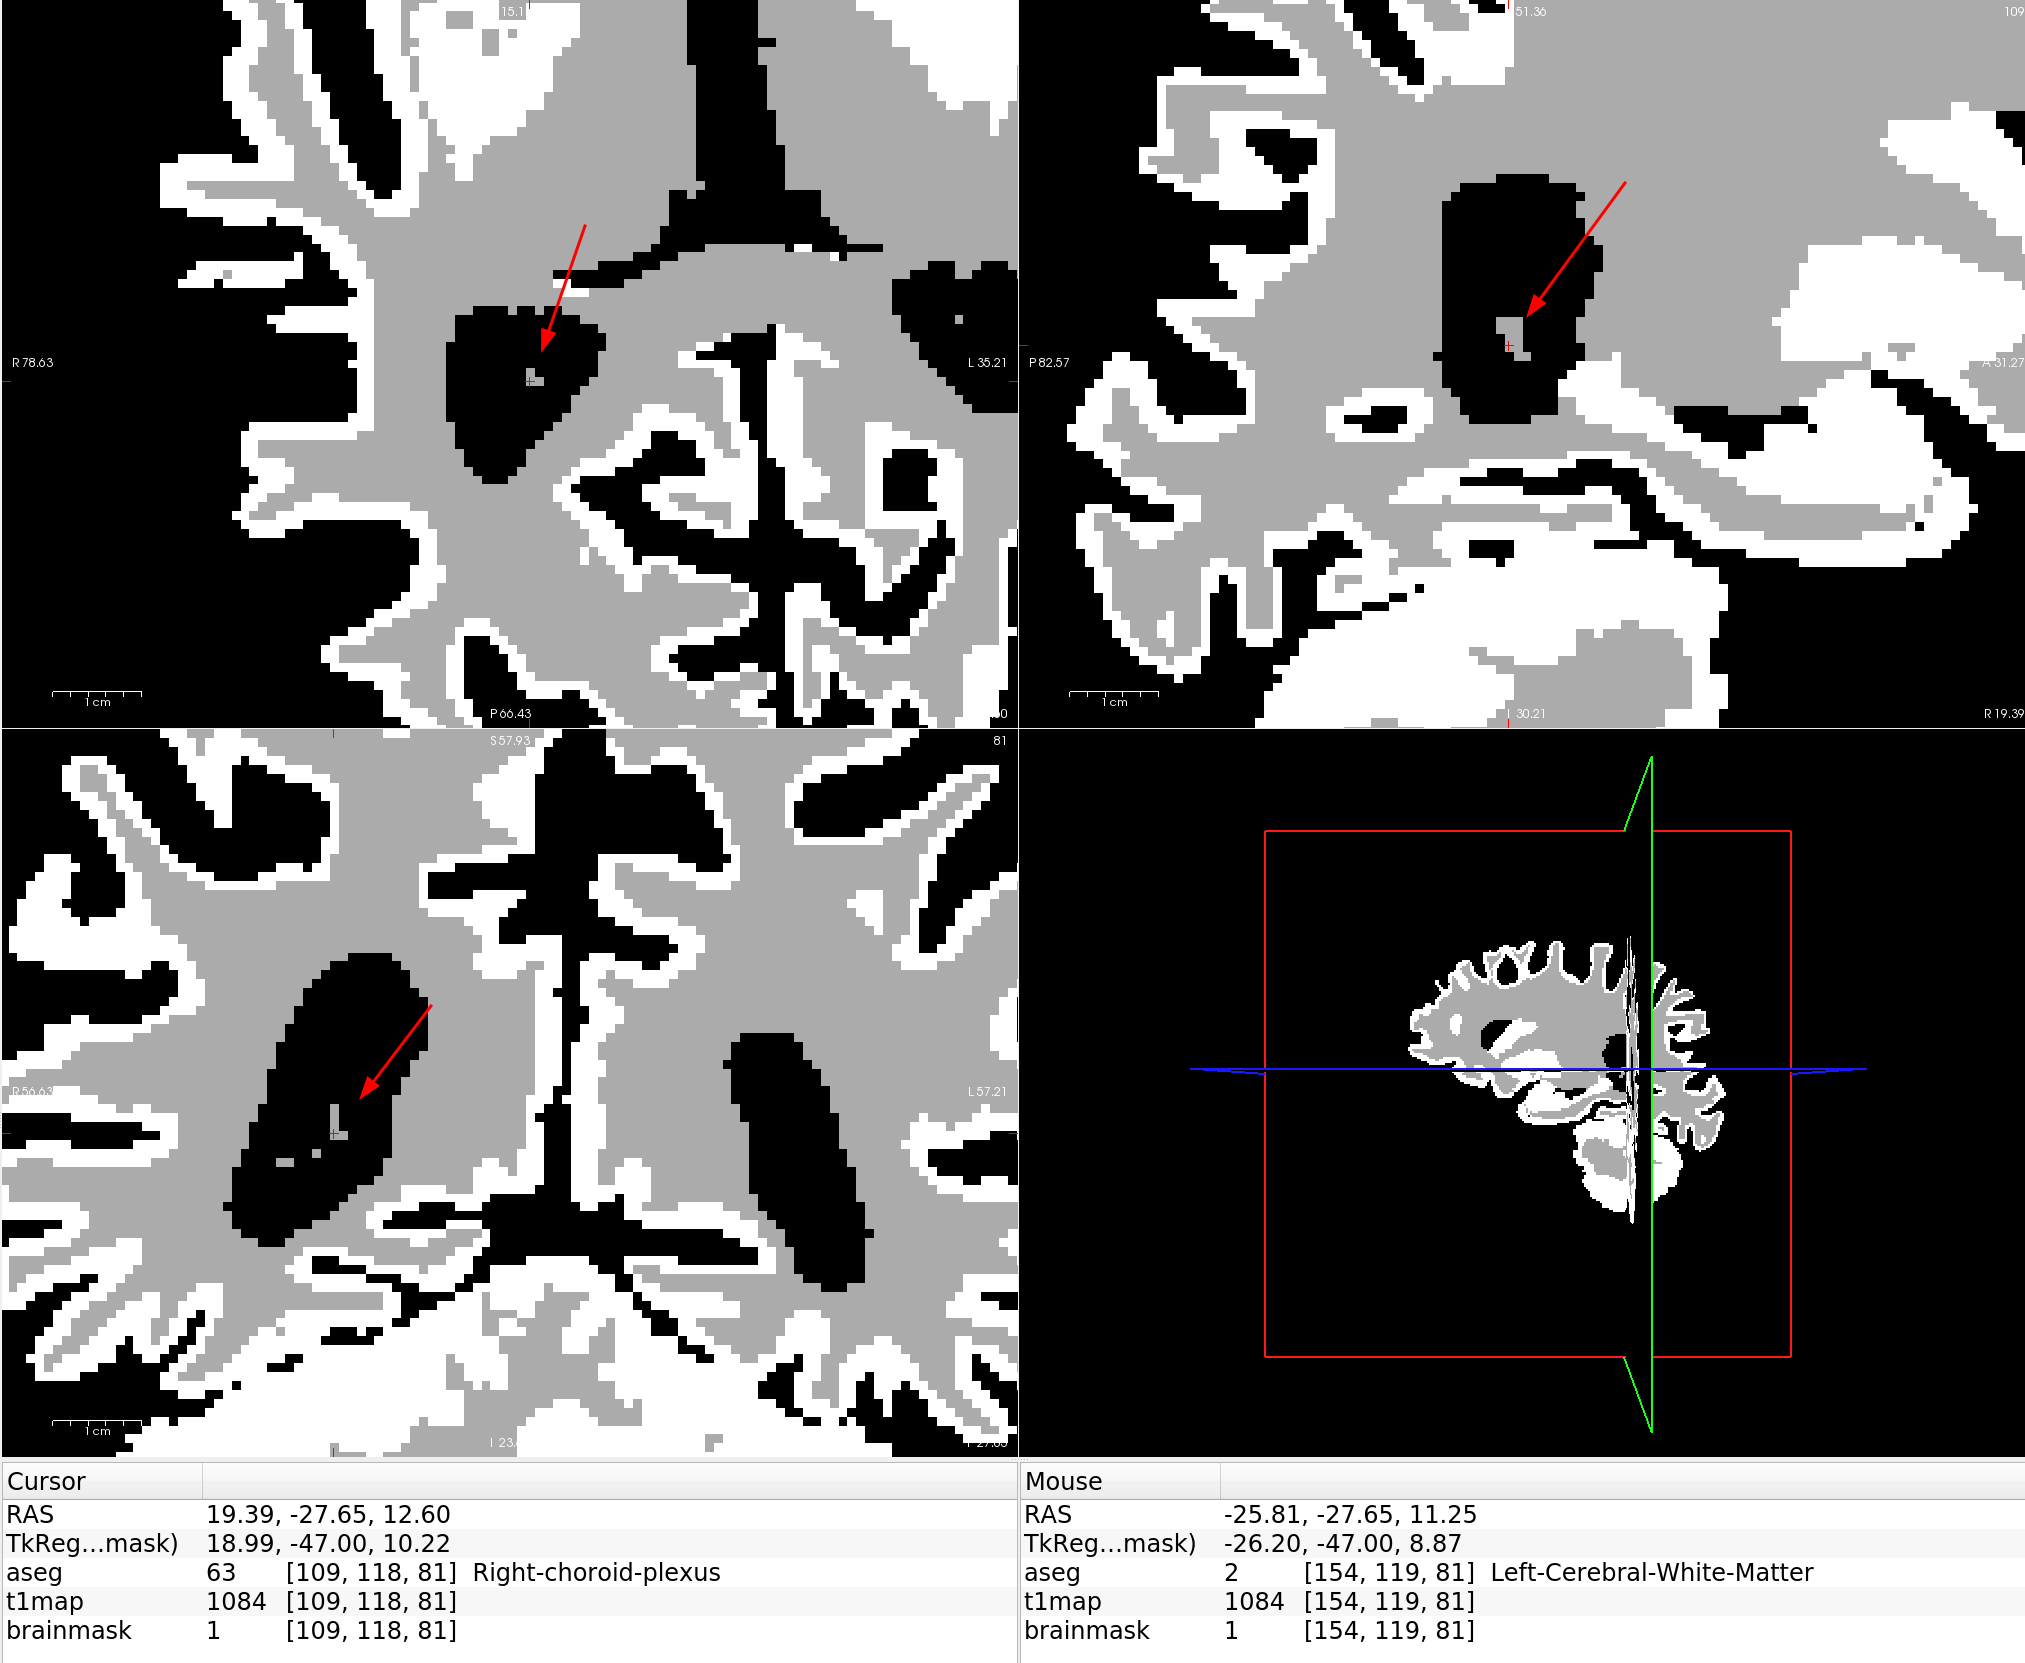

In [193]:
mask

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

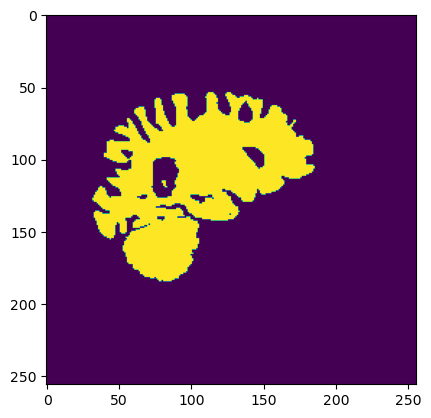

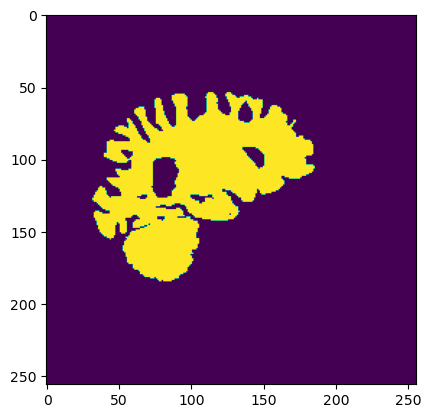

In [209]:
import skimage
mask = np.load(paths.patient_root / "brainmask.npy")
slice_idx = np.s_[109, :, :]
plt.imshow(mask[slice_idx])
newmask = skimage.morphology.remove_small_objects(mask, 50, connectivity=2)

plt.show()
plt.imshow(newmask[slice_idx])
plt.show()

In [128]:
np.array([False, True]).astype(float)

array([0., 1.])

In [126]:
(aseg == 2).astype(float)

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.